In [21]:
#profitableHospital-project - KNN Model

In [22]:
#dependencies
import pandas as pd

import requests
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

import tensorflow
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import joblib

In [23]:
#Main File Read
df = pd.read_csv("targetedCO2017.csv")
df.head()

,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,CON,Urban,Inpatient %,Outpatient %,...,Uncompensated %,Rev Per Discharge,Rev Per Bed,Rev Per Bed Days,Rev Per FTE,Discharges Per Bed,Discharges Per Bed Days,Discharges Per FTE,Net Income %,Net Income Score
0,60049,YAMPA VALLEY MEDICAL CENTER,1024 CENTRAL PARK DRIVE,STEAMBOAT SPRINGS,CO,80487,0.0,0.0,0.293271,0.706729,...,0.002099,66656.736548,2.445789e+06,6700.793116,217721.097441,36.692308,0.100527,36.692308,0.154109,1
1,60071,DELTA COUNTY MEMORIAL HOSPITAL,1501 E. 3RD ST.,DELTA,CO,81416,0.0,0.0,0.201012,0.798988,...,0.000291,45637.017052,1.529306e+06,4189.878781,156468.683705,33.510204,0.091809,33.510204,-0.029169,2
2,60127,SCL HEALTH COMMUNITY HOSPITAL - WEST,6500 WEST 104TH AVE SUITE 100,WESTMINSTER,CO,80020,0.0,1.0,0.084941,0.915059,...,0.005928,145831.227642,7.473850e+05,2007.300918,163720.710113,5.125000,0.013765,5.125000,-1.293807,3
3,60126,BANNER FORT COLLINS MEDICAL CENTER,4700 LADY MOON DRIVE,FORT COLLINS,CO,80528,0.0,1.0,0.379743,0.620257,...,0.018090,30976.631238,1.457248e+06,3992.461584,201604.300752,47.043478,0.128886,47.043478,-0.390273,3
4,60096,VAIL VALLEY MEDICAL CENTER,181 WEST MEADOW DRIVE,VAIL,CO,81657,0.0,0.0,0.376580,0.623420,...,0.006931,79665.064578,2.951875e+06,8087.329207,257934.416739,37.053571,0.101517,37.053571,0.510514,1


In [24]:
#Features File Read
features = pd.read_csv("featuresCO2017.csv")
features.head()

,CON,Urban,Inpatient %,Outpatient %,Charity %,Uncompensated %,Rev Per Discharge,Rev Per Bed,Rev Per Bed Days,Rev Per FTE,Discharges Per Bed,Discharges Per Bed Days,Discharges Per FTE
0,0.0,0.0,0.293271,0.706729,0.002099,0.002099,66656.736548,2.445789e+06,6700.793116,217721.097441,36.692308,0.100527,36.692308
1,0.0,0.0,0.201012,0.798988,0.000291,0.000291,45637.017052,1.529306e+06,4189.878781,156468.683705,33.510204,0.091809,33.510204
2,0.0,1.0,0.084941,0.915059,0.005928,0.005928,145831.227642,7.473850e+05,2007.300918,163720.710113,5.125000,0.013765,5.125000
3,0.0,1.0,0.379743,0.620257,0.018090,0.018090,30976.631238,1.457248e+06,3992.461584,201604.300752,47.043478,0.128886,47.043478
4,0.0,0.0,0.376580,0.623420,0.006931,0.006931,79665.064578,2.951875e+06,8087.329207,257934.416739,37.053571,0.101517,37.053571


In [25]:
y = df[['Net Income Score']]

In [26]:
X = features

In [27]:
#Create a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [28]:
y_train.shape

(33, 1)

In [29]:
X_train.shape

(33, 13)

In [30]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

k: 1, Train/Test Score: 1.000/0.636
k: 3, Train/Test Score: 0.758/0.364
k: 5, Train/Test Score: 0.667/0.455
k: 7, Train/Test Score: 0.667/0.364
k: 9, Train/Test Score: 0.576/0.364
k: 11, Train/Test Score: 0.545/0.364
k: 13, Train/Test Score: 0.515/0.364
k: 15, Train/Test Score: 0.515/0.455
k: 17, Train/Test Score: 0.485/0.455
k: 19, Train/Test Score: 0.485/0.455


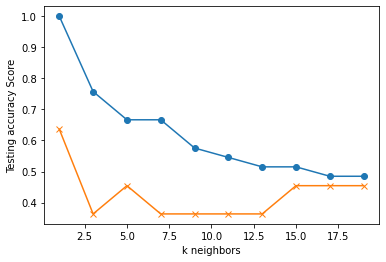

In [31]:
# Create the for loop and KNN model
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [32]:
# Review a range of K values for most efficient accuracy
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.455


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [34]:
# Review a range of K values for most efficient accuracy
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.455


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [35]:
# Create the KNN model for GridSearchCV enhancement
#from sklearn.svm import SVC 
modelc = KNeighborsClassifier(n_neighbors=15)
modelc

KNeighborsClassifier(n_neighbors=15)

In [36]:
# Train the model with GridSearch
param_grid = {'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [15, 20, 30]}
gridc = GridSearchCV(modelc, param_grid, verbose=3)

In [37]:
gridc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............algorithm=ball_tree, leaf_size=15; total time=   0.0s
[CV 2/5] END ..............algorithm=ball_tree, leaf_size=15; total time=   0.0s
[CV 3/5] END ..............algorithm=ball_tree, leaf_size=15; total time=   0.0s
[CV 4/5] END ..............algorithm=ball_tree, leaf_size=15; total time=   0.0s
[CV 5/5] END ..............algorithm=ball_tree, leaf_size=15; total time=   0.0s
[CV 1/5] END ..............algorithm=ball_tree, leaf_size=20; total time=   0.0s
[CV 2/5] END ..............algorithm=ball_tree, leaf_size=20; total time=   0.0s
[CV 3/5] END ..............algorithm=ball_tree, leaf_size=20; total time=   0.0s
[CV 4/5] END ..............algorithm=ball_tree, leaf_size=20; total time=   0.0s
[CV 5/5] END ..............algorithm=ball_tree, leaf_size=20; total time=   0.0s
[CV 1/5] END ..............algorithm=ball_tree, leaf_size=30; total time=   0.0s
[CV 2/5] END ..............algorithm=ball_tree, l

C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

[CV 3/5] END ................algorithm=kd_tree, leaf_size=20; total time=   0.0s
[CV 4/5] END ................algorithm=kd_tree, leaf_size=20; total time=   0.0s
[CV 5/5] END ................algorithm=kd_tree, leaf_size=20; total time=   0.0s
[CV 1/5] END ................algorithm=kd_tree, leaf_size=30; total time=   0.0s
[CV 2/5] END ................algorithm=kd_tree, leaf_size=30; total time=   0.0s
[CV 3/5] END ................algorithm=kd_tree, leaf_size=30; total time=   0.0s
[CV 4/5] END ................algorithm=kd_tree, leaf_size=30; total time=   0.0s
[CV 5/5] END ................algorithm=kd_tree, leaf_size=30; total time=   0.0s
[CV 1/5] END ..................algorithm=brute, leaf_size=15; total time=   0.0s
[CV 2/5] END ..................algorithm=brute, leaf_size=15; total time=   0.0s
[CV 3/5] END ..................algorithm=brute, leaf_size=15; total time=   0.0s
[CV 4/5] END ..................algorithm=brute, leaf_size=15; total time=   0.0s
[CV 5/5] END ...............

C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=15),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 20, 30]},
             verbose=3)

In [41]:
print(gridc.best_params_)
print(gridc.best_score_)

{'algorithm': 'ball_tree', 'leaf_size': 15}
0.5428571428571429


In [42]:
predictions = gridc.predict(X_test)

In [43]:
# Calculate classification report
print(classification_report(y_test, predictions,
                            target_names=["3", "2" , "1"]))

              precision    recall  f1-score   support

           3       0.27      1.00      0.43         3
           2       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         3

    accuracy                           0.27        11
   macro avg       0.09      0.33      0.14        11
weighted avg       0.07      0.27      0.12        11



C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
